In [1]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np
import os

/home/zhangzr/anaconda3/envs/mmseg-kaggle/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# useful tools
def load_img(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = img.astype('float32') # original is uint16
    img = (img - img.min())/(img.max() - img.min())*255.0 # scale image to [0, 255]
    img = img.astype('uint8')
    return img

def show_img(img, mask=None):
    # clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
   #  img = clahe.apply(img)
#     plt.figure(figsize=(10,10))
    plt.imshow(img, cmap='bone')
    
    if mask is not None:
        # plt.imshow(np.ma.masked_where(mask!=1, mask), alpha=0.5, cmap='autumn')
        plt.imshow(mask, alpha=0.5)
        handles = [Rectangle((0,0),1,1, color=_c) for _c in [(0.667,0.0,0.0), (0.0,0.667,0.0), (0.0,0.0,0.667)]]
        labels = [ "Large Bowel", "Small Bowel", "Stomach"]
        plt.legend(handles,labels)
    plt.axis('off')

In [3]:
config_file = '../cache/upernet_originsize_convnext_base_fp16_256x256_160k_kaggle_25d_multilabel/upernet_originsize_convnext_base_fp16_256x256_160k_kaggle_25d_multilabel.py'
checkpoint_file = '../cache/upernet_originsize_convnext_base_fp16_256x256_160k_kaggle_25d_multilabel/best_mDice_iter_64000.pth'

In [4]:
# build the model from a config file and a checkpoint file
model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

/home/zhangzr/mmsegmentation_kaggle/mmseg/models/losses/cross_entropy_loss.py:238: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


load checkpoint from local path: ../cache/upernet_originsize_convnext_base_fp16_256x256_160k_kaggle_25d_multilabel/best_mDice_iter_64000.pth


In [5]:
# test a single image
# img_path = '../input/uw-madison-gi-tract-image-segmentation/train/case123/case123_day20/scans/slice_0099_266_266_1.50_1.50.png'
img_path = '../data/2_5d_seg_data/images/case142_day0_slice_0098.png'
gt_file_path = '../data/2_5d_seg_data/masks/case142_day0_slice_0098.png'
result = inference_segmentor(model, img_path)

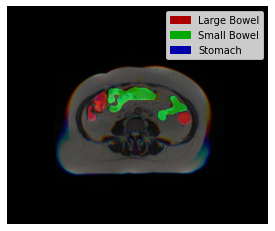

In [6]:
# show the results
processed_img = load_img(img_path)
res = result[0]
'''
convert_pred = np.zeros((res.shape[0],res.shape[1],3))
for i in range(res.shape[0]):
    for j in range(res.shape[1]):
        if res[i,j] == 1:
            convert_pred[i,j,:] = [1,0,0]
        if res[i,j] == 2:
            convert_pred[i,j,:] = [0,1,0]
        if res[i,j] == 3:
            convert_pred[i,j,:] = [0,0,1]
'''
res[res==1]=255

show_img(processed_img, res)

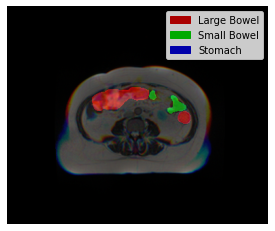

In [7]:
# show gt
gt = cv2.imread(gt_file_path, cv2.IMREAD_UNCHANGED)
'''
convert_gt = np.zeros((gt.shape[0],gt.shape[1],3))
for i in range(gt.shape[0]):
    for j in range(gt.shape[1]):
        if gt[i,j] == 1:
            convert_gt[i,j,:] = [1,0,0]
        if gt[i,j] == 2:
            convert_gt[i,j,:] = [0,1,0]
        if gt[i,j] == 3:
            convert_gt[i,j,:] = [0,0,1]
'''
gt[gt==1]=255
show_img(processed_img, gt)